In [90]:
# loading data
import pandas as pd
response_file="form-data.csv"
dataframe=pd.read_csv(response_file)
print(dataframe.head)

<bound method NDFrame.head of           Timestamp                Email Address  Gender  \
0               NaN                          NaN     NaN   
1   8/24/2023 23:03      dewanaminul12@gmail.com    Male   
2    8/25/2023 3:21      tanzilshahria@gmail.com    Male   
3    8/25/2023 3:27      progga.tasnim@gmail.com  Female   
4   8/26/2023 11:45  saif.ahmed02@northsouth.edu    Male   
..              ...                          ...     ...   
61   9/17/2023 0:45      knightdark760@gmail.com    Male   
62  9/18/2023 23:43            labib77@gmail.com    Male   
63   9/19/2023 1:13            emon331@gmail.com    Male   
64  9/22/2023 15:47  farabisaifullah32@gmail.com    Male   
65  10/5/2023 12:25         subi.freya@gmail.com  Female   

   Cumulative Grade Point Average(CGPA)  \
0                                   NaN   
1                            3 to < 3.5   
2                              3.5 to 4   
3                              3.5 to 4   
4                              3.5

In [91]:
# Dropping unrelated columns
dataframe=dataframe.drop(columns=['Timestamp','Email Address'])


# Splitting the "Cumulative Grade Point Average(CGPA)" column into "Minimum CGPA" and "Maximum CGPA" columns
dataframe[['Minimum CGPA', 'Maximum CGPA']] = dataframe['Cumulative Grade Point Average(CGPA)'].str.split('<', expand=True)
dataframe[['Minimum CGPA', 'Maximum CGPA']] = dataframe['Minimum CGPA'].str.split(' to ', expand=True)

dataframe=dataframe.drop('Cumulative Grade Point Average(CGPA)',axis=1)

dataframe['Minimum CGPA'] = pd.to_numeric(dataframe['Minimum CGPA'], errors='coerce')
dataframe['Maximum CGPA'] = pd.to_numeric(dataframe['Maximum CGPA'], errors='coerce')
dataframe[['Minimum CGPA','Maximum CGPA']]=dataframe[['Minimum CGPA','Maximum CGPA']].fillna(0)
dataframe['Average CGPA']=(dataframe['Minimum CGPA']+dataframe['Maximum CGPA'])/2



dataframe['What was your starting salary range?'] = dataframe['What was your starting salary range?'].str.replace('BDT', '')
dataframe['What was your starting salary range?'] = dataframe['What was your starting salary range?'].str.replace('> ', '')

# Splitting the "Salary" column into "Minimum Salary" and "Maximum Salary" columns
dataframe[['Minimum Salary', 'Maximum Salary']] = dataframe['What was your starting salary range?'].str.split(' - ', expand=True)

dataframe=dataframe.drop('What was your starting salary range?',axis=1)

dataframe['Minimum Salary'] = dataframe['Minimum Salary'].str.replace('K', '000')

dataframe['Maximum Salary'] = dataframe['Maximum Salary'].str.replace('K', '000')

dataframe[['Minimum Salary','Maximum Salary']]=dataframe[['Minimum Salary','Maximum Salary']].fillna(0)

# Converting the data type of the salary columns

dataframe[['Minimum Salary','Maximum Salary']] = dataframe[['Minimum Salary','Maximum Salary']].astype(int)

dataframe['Average Salary']=(dataframe['Minimum Salary']+dataframe['Maximum Salary'])/2
dataframe=dataframe.drop(columns=['Minimum Salary','Maximum Salary'])

# Replacing some row data
dataframe['Total year now since your graduation  ']=dataframe['Total year now since your graduation  '].str.replace(' years','')
dataframe['Total year now since your graduation  ']=dataframe['Total year now since your graduation  '].str.replace(' year','')


<h3>Average Salary Statistics</h3>

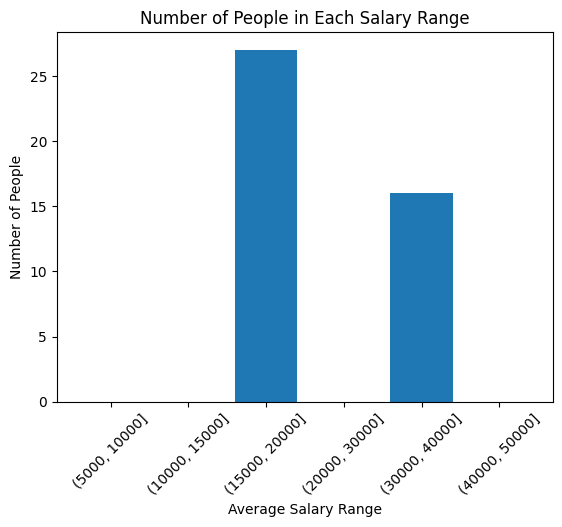

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [5000, 10000, 15000, 20000, 30000,
        40000,50000]

dataframe['Salary_Range'] = pd.cut(dataframe['Average Salary'], bins=bins)
salary_counts = dataframe['Salary_Range'].value_counts().sort_index()

salary_ranges = [str(interval) for interval in salary_counts.index]

plt.bar(salary_ranges, salary_counts.values)
plt.xlabel('Average Salary Range')
plt.ylabel('Number of People')
plt.title('Number of People in Each Salary Range')
plt.xticks(rotation=45)
plt.show()


<h3>CGPA Statistics</h3>

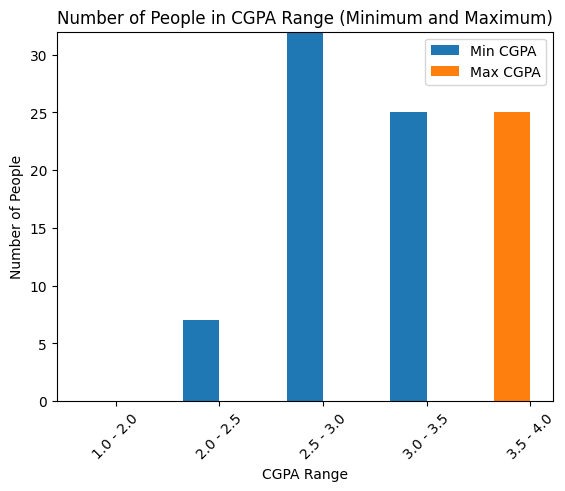

In [93]:
bins = [1.0, 2.0, 2.5, 3.0, 3.5, 4.0]

# Create new columns for CGPA ranges based on "Minimum_CGPA" and "Maximum_CGPA"
dataframe['Min_CGPA_Range'] = pd.cut(dataframe['Minimum CGPA'], bins=bins)
dataframe['Max_CGPA_Range'] = pd.cut(dataframe['Maximum CGPA'], bins=bins)

# Count the number of people in each CGPA range for both minimum and maximum CGPA
min_cgpa_counts = dataframe['Min_CGPA_Range'].value_counts().sort_index()
max_cgpa_counts = dataframe['Max_CGPA_Range'].value_counts().sort_index()

# Create a bar chart with both minimum and maximum CGPA counts
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
x = range(len(bins) - 1)

# Plot minimum CGPA counts
ax.bar(x, min_cgpa_counts, width, label='Min CGPA')

# Plot maximum CGPA counts on top of minimum CGPA counts
ax.bar(x, max_cgpa_counts, width, bottom=min_cgpa_counts, label='Max CGPA')

ax.set_xlabel('CGPA Range')
ax.set_ylabel('Number of People')
ax.set_title('Number of People in CGPA Range (Minimum and Maximum)')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels([f"{bins[i]} - {bins[i+1]}" for i in x], rotation=45)
ax.legend()

plt.show()


<h3>Programming Language Statistics</h3>

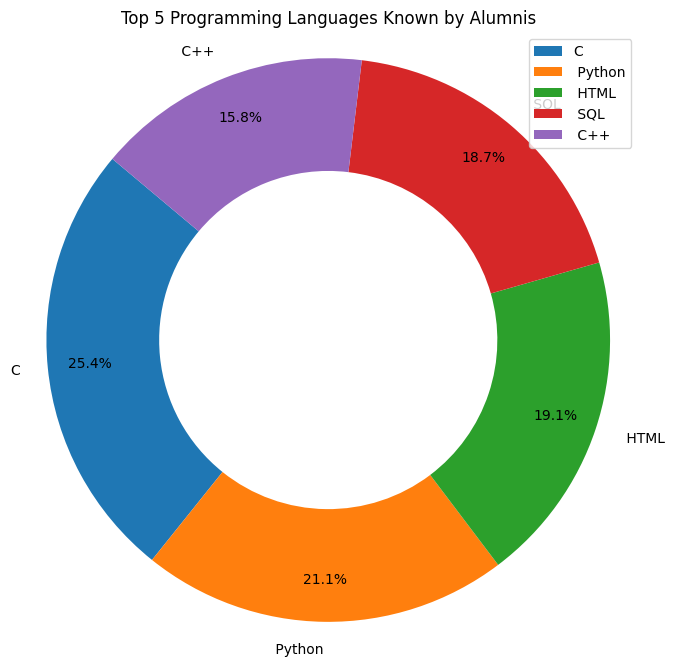

In [94]:
dataframe['Programming_Languages'] = dataframe['Programming languages you know'].str.split(',')
programming_languages = dataframe['Programming_Languages'].explode()
language_counts = programming_languages.value_counts()
top_languages = language_counts.head(5)

# Create a pie chart to visualize the top 5 languages
plt.figure(figsize=(8, 8))
plt.pie(top_languages, labels=top_languages.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, wedgeprops=dict(width=0.4))
plt.axis('equal')

# Add a title and a legend
plt.title('Top 5 Programming Languages Known by Alumnis')
plt.legend(loc='upper right', labels=top_languages.index)

plt.show()

<h3>Relational Statistics</h3>

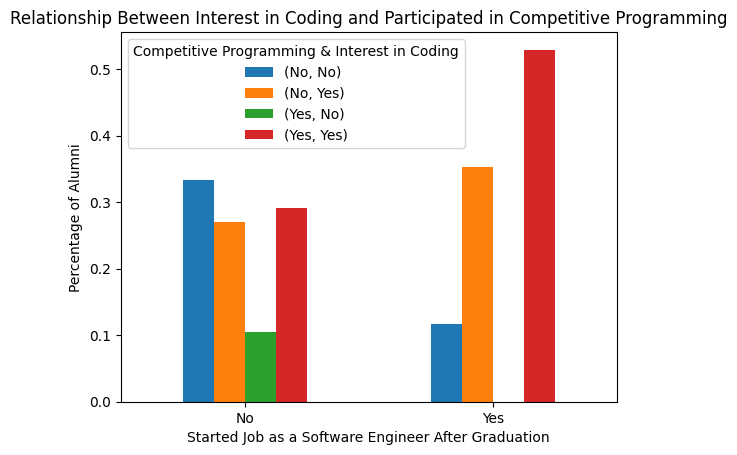

In [95]:
cross_tab = pd.crosstab(index=dataframe["Did you start working as a software engineer after graduation?"], columns=[dataframe["Did you participate in any competitive programming? "], dataframe["Were you interested in coding?"]], normalize='index')
cross_tab.plot(kind='bar', stacked=False)

plt.xlabel("Started Job as a Software Engineer After Graduation")
plt.ylabel("Percentage of Alumni")
plt.title("Relationship Between Interest in Coding and Participated in Competitive Programming")
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.legend(title="Competitive Programming & Interest in Coding")
plt.show()

<h3>Is CGPA important lending a job?<h3>

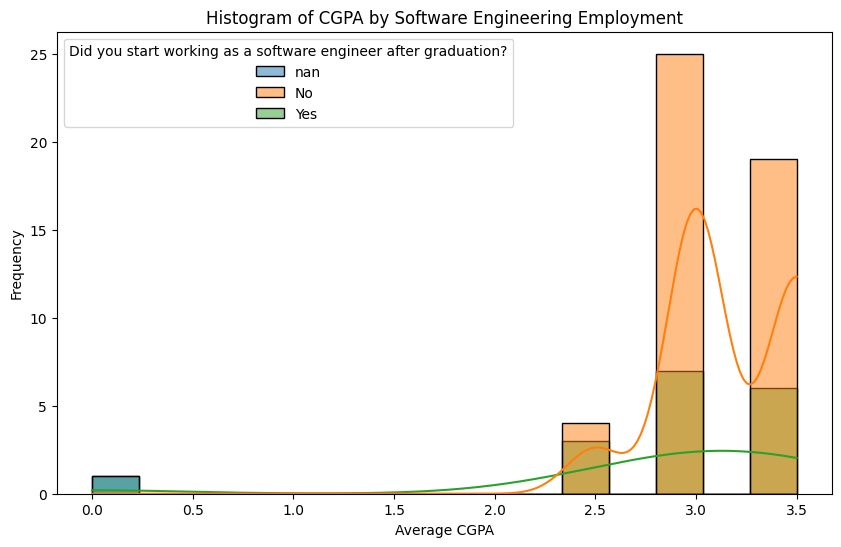

In [96]:
import seaborn as sns

# Convert the column to string type
dataframe['Did you start working as a software engineer after graduation?'] = dataframe['Did you start working as a software engineer after graduation?'].astype(str)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.histplot(data=dataframe, x='Minimum CGPA', hue='Did you start working as a software engineer after graduation?', kde=True)
plt.xlabel("Average CGPA")
plt.ylabel("Frequency")
plt.title("Histogram of CGPA by Software Engineering Employment")
plt.show()